In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
data=pd.read_csv('stock.csv',date_parser =True )

C:\Users\hp\AppData\Local\Temp\ipykernel_26632\335281838.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data=pd.read_csv('GOOG.csv',date_parser =True )


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4295 non-null   object 
 1   Open       4295 non-null   float64
 2   High       4295 non-null   float64
 3   Low        4295 non-null   float64
 4   Close      4295 non-null   float64
 5   Adj Close  4295 non-null   float64
 6   Volume     4295 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 235.0+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4.295000e+03
mean,622.526680,628.518538,616.654304,622.797745,622.797745,6.550729e+06
std,535.910568,541.047552,531.727050,536.764258,536.764258,7.841426e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,244.339157,247.233307,241.046501,243.980499,243.980499,1.601342e+06
50%,392.229828,396.488861,390.003174,393.719238,393.719238,3.880700e+06
75%,923.974976,930.118500,916.519989,923.275024,923.275024,8.294072e+06
max,2918.989990,2936.409912,2912.290039,2916.840088,2916.840088,8.254163e+07


In [6]:
data_training = data [data['Date']<'2018-12-30'].copy()
data_training


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
3611,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800


In [7]:
data_test = data [data['Date']>='2018-12-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
...,...,...,...,...,...,...,...
4290,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
4291,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
4292,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4293,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 3616 to 4294
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       679 non-null    object 
 1   Open       679 non-null    float64
 2   High       679 non-null    float64
 3   Low        679 non-null    float64
 4   Close      679 non-null    float64
 5   Adj Close  679 non-null    float64
 6   Volume     679 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.4+ KB


In [9]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3616 non-null   object 
 1   Open       3616 non-null   float64
 2   High       3616 non-null   float64
 3   Low        3616 non-null   float64
 4   Close      3616 non-null   float64
 5   Adj Close  3616 non-null   float64
 6   Volume     3616 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 226.0+ KB


In [10]:
data['Date']

0       2004-08-19
1       2004-08-20
2       2004-08-23
3       2004-08-24
4       2004-08-25
           ...    
4290    2021-09-02
4291    2021-09-03
4292    2021-09-07
4293    2021-09-08
4294    2021-09-09
Name: Date, Length: 4295, dtype: object

In [11]:
data_training2 = data_training.drop(['Date', 'Adj Close','Volume'], axis = 1)
data_training2

,Open,High,Low,Close
0,49.813290,51.835709,47.800831,49.982655
1,50.316402,54.336334,50.062355,53.952770
2,55.168217,56.528118,54.321388,54.495735
3,55.412300,55.591629,51.591621,52.239197
4,52.284027,53.798351,51.746044,52.802086
...,...,...,...,...
3611,1015.299988,1024.020020,973.690002,979.539978
3612,973.900024,1003.539978,970.109985,976.219971
3613,989.010010,1040.000000,983.000000,1039.459961
3614,1017.150024,1043.890015,997.000000,1043.880005


In [12]:
data_training['Close']

0         49.982655
1         53.952770
2         54.495735
3         52.239197
4         52.802086
           ...     
3611     979.539978
3612     976.219971
3613    1039.459961
3614    1043.880005
3615    1037.079956
Name: Close, Length: 3616, dtype: float64

In [13]:
scalar = MinMaxScaler()
data_training2 = scalar.fit_transform(data_training2)
data_training2

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03],
       ...,
       [7.69161548e-01, 8.08789971e-01, 7.78541650e-01, 8.12172507e-01],
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01]])

In [14]:
x_train = []
y_train = []

In [15]:
data_training2.shape

(3616, 4)

In [16]:
for i in range(60, data_training2.shape[0]):
    x_train.append(data_training2[i-60:i])
    y_train.append(data_training2[i,0])

In [17]:

x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
(x_train.shape, y_train.shape)

((3556, 60, 4), (3556,))

In [19]:
x_train

array([[[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04],
        [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03],
        ...,
        [3.05463616e-02, 2.99154223e-02, 2.87421258e-02, 2.80807737e-02],
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02],
        [2.85197221e-02, 3.33972717e-02, 2.96959051e-02, 3.39348522e-02]],

       [[7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03],
        [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03],
        [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98679178e-03],
        ...,
        [2.91476913e-02, 2.88240316e-02, 2.91816917e-02, 2.77373761e-02],
        [2.85197221e-02, 3.33972717e-02, 2.96959051e-02, 3.39348522e-02],
        [3.50848828e-02, 3.58610433e-02, 3.37723068e-02, 3.35178722e-02]],

       [[4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03],
        

In [20]:
y_train

array([0.03508488, 0.03313572, 0.03193279, ..., 0.76916155, 0.79219711,
       0.81877719])

In [21]:
x_train[1].shape

(60, 4)

In [22]:
x_train.shape[1], 4

(60, 4)

In [23]:
regressior = Sequential()

regressior.add(LSTM(units = 40, activation = 'relu', return_sequences = True, input_shape = (x_train[1].shape)))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 40, activation = 'relu', return_sequences = True))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'linear', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [24]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 40)            7200      
                                                                 
 lstm_1 (LSTM)               (None, 60, 40)            12960     
                                                                 
 lstm_2 (LSTM)               (None, 60, 60)            24240     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           64400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 120)           1

In [25]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
regressior.fit(x_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
56/56 [==============================] - 30s 281ms/step - loss: 0.0742
Epoch 2/10
56/56 [==============================] - 17s 300ms/step - loss: 0.0604
Epoch 3/10
56/56 [==============================] - 19s 334ms/step - loss: 0.0592
Epoch 4/10
56/56 [==============================] - 19s 339ms/step - loss: 0.0591
Epoch 5/10
56/56 [==============================] - 19s 336ms/step - loss: 0.0587
Epoch 6/10
56/56 [==============================] - 19s 343ms/step - loss: 0.0580
Epoch 7/10
56/56 [==============================] - 19s 340ms/step - loss: 0.0581
Epoch 8/10
56/56 [==============================] - 19s 343ms/step - loss: 0.0578
Epoch 9/10
56/56 [==============================] - 18s 318ms/step - loss: 0.0577
Epoch 10/10
56/56 [==============================] - 17s 300ms/step - loss: 0.0576


In [27]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
...,...,...,...,...,...,...,...
4290,2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200
4291,2021-09-03,2882.919922,2907.540039,2870.100098,2895.500000,2895.500000,955200
4292,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
4293,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300


In [28]:
last_60_days = data_training.tail(60)

In [29]:
last_60_days

,Date,Open,High,Low,Close,Adj Close,Volume
3556,2018-10-03,1205.000000,1206.410034,1193.829956,1202.949951,1202.949951,1256200
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500


In [30]:
frames = [last_60_days,data_test]

df = pd.concat(frames)

df = df.drop(['Date', 'Adj Close','Volume'], axis = 1)

In [31]:
df = scalar.transform(df)
df

array([[0.94597206, 0.94483369, 0.95405496, 0.94634438],
       [0.93805611, 0.93755773, 0.92220906, 0.91781776],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169],
       ...,
       [2.32940653, 2.342852  , 2.36677807, 2.34758652],
       [2.33995027, 2.33838837, 2.36110045, 2.3371558 ],
       [2.33160034, 2.34018687, 2.36499644, 2.33764828]])

In [32]:
x_test = []
y_test = []

In [33]:
for i in range(60, df.shape[0]):
    x_test.append(df[i-60:i])
    y_test.append(df[i,0])

In [34]:
y_test

[0.8198740959283024,
 0.7917223032664492,
 0.8117208207889364,
 0.8048363238382531,
 0.8366882771625774,
 0.8404620345189918,
 0.8449971388481974,
 0.833544861307454,
 0.8298775267105757,
 0.8165669991594293,
 0.8192274658221943,
 0.8436464207421167,
 0.8432125362852556,
 0.8600185232822092,
 0.8501952617581537,
 0.8414770975090313,
 0.840764914322958,
 0.8477394463771398,
 0.8437364550270103,
 0.8376542754171197,
 0.83417520362735,
 0.8624743386632231,
 0.8701692465035896,
 0.870382092022662,
 0.8803526468044298,
 0.8924106839531054,
 0.8634239484431228,
 0.849376656631149,
 0.8575217375331939,
 0.8655850782574919,
 0.8804754572200035,
 0.8747943859362939,
 0.8846421294838828,
 0.8682045745522554,
 0.8763824315849804,
 0.8688921750263651,
 0.8607552875430364,
 0.8731162053142832,
 0.8647255027624858,
 0.8657077888032402,
 0.8692688013290126,
 0.8804018105911474,
 0.8984847700141053,
 0.9009979442377631,
 0.911173149482677,
 0.9056311772193582,
 0.8818998219549403,
 0.8964054810659136,

In [35]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((679, 60, 4), (679,))

In [36]:
y_pred = regressior.predict(x_test)

22/22 [==============================] - 3s 56ms/step


In [37]:
y_pred

array([[[0.2023461 ],
        [0.27768877],
        [0.31996632],
        ...,
        [0.33407202],
        [0.3340534 ],
        [0.33403343]],

       [[0.20234546],
        [0.27768934],
        [0.31997326],
        ...,
        [0.33405328],
        [0.33403334],
        [0.3340139 ]],

       [[0.20234698],
        [0.27769628],
        [0.31999037],
        ...,
        [0.33403325],
        [0.33401385],
        [0.3339962 ]],

       ...,

       [[0.20226789],
        [0.27729765],
        [0.3188705 ],
        ...,
        [0.34503034],
        [0.34509888],
        [0.345172  ]],

       [[0.20226878],
        [0.27729943],
        [0.31887242],
        ...,
        [0.34509888],
        [0.34517202],
        [0.34524712]],

       [[0.20226717],
        [0.27729416],
        [0.31886253],
        ...,
        [0.34517208],
        [0.34524715],
        [0.34532157]]], dtype=float32)

In [38]:
scalar.scale_ , scalar.min_

(array([0.00081861, 0.00081752, 0.00083249, 0.00082067]),
 array([-0.04044712, -0.041432  , -0.0397936 , -0.04088452]))

In [39]:
scale = 1/scalar.scale_[0]
scale

1221.590199

In [40]:
y_pred = (y_pred * (1 / scalar.scale_[0])) + scalar.min_[0]
y_test = (y_test * (1 / scalar.scale_[0])) + scalar.min_[0]

In [41]:
y_pred

array([[[247.14357],
        [339.18146],
        [390.82727],
        ...,
        [408.0587 ],
        [408.03592],
        [408.01154]],

       [[247.14278],
        [339.18213],
        [390.83575],
        ...,
        [408.03577],
        [408.0114 ],
        [407.98767]],

       [[247.14464],
        [339.1906 ],
        [390.85666],
        ...,
        [408.01132],
        [407.9876 ],
        [407.96606]],

       ...,

       [[247.04802],
        [338.70364],
        [389.48868],
        ...,
        [421.44525],
        [421.529  ],
        [421.6183 ]],

       [[247.0491 ],
        [338.70584],
        [389.491  ],
        ...,
        [421.529  ],
        [421.61832],
        [421.71005]],

       [[247.04715],
        [338.6994 ],
        [389.4789 ],
        ...,
        [421.6184 ],
        [421.7101 ],
        [421.801  ]]], dtype=float32)

In [42]:
y_test

array([1001.50971288,  967.11975888,  991.54975188,  983.13971788,
       1022.04975188, 1026.65973688, 1032.19977588, 1018.20978588,
       1013.72980588,  997.46979588, 1000.71979588, 1030.54975188,
       1030.01972288, 1050.54975188, 1038.54975188, 1027.89972788,
       1027.02973188, 1035.54975188, 1030.65973688, 1023.22980588,
       1018.97980588, 1053.54975188, 1062.94977588, 1063.20978588,
       1075.38971788, 1090.11969788, 1054.70978588, 1037.54975188,
       1047.49970288, 1057.34980088, 1075.53974188, 1068.59980088,
       1080.62970788, 1060.54975188, 1070.53974188, 1061.38971788,
       1051.44977588, 1066.54975188, 1056.29975188, 1057.49970288,
       1061.84980088, 1075.44977588, 1097.53974188, 1100.60981088,
       1113.03974188, 1106.26972288, 1077.27973188, 1094.99970288,
       1128.80976188, 1151.19477188, 1145.05976188, 1143.92975688,
       1133.84980088, 1139.35981088, 1147.89972788, 1166.54975188,
       1176.86969788, 1147.47980588, 1149.07978088, 1136.04975

In [43]:
y_pred.shape, y_test.shape

((679, 60, 1), (679,))

In [44]:
y_pred_new= []
for i in y_pred:
    y_pred_new.append(i[59][0])
    
y_pred_new = np.array(y_pred_new)
len(y_pred_new)

679

In [45]:
first_y_test = y_test[0]
first_y_pred = y_pred_new[0]
scale_diff_y_test = 0
for i in range(1,len(y_test)):
    scale_diff_y_test += y_test[i] - y_test[i-1]
scale_diff_y_pred = 0
for i in range(1,len(y_pred_new)):
    scale_diff_y_pred += y_pred_new[i] - y_pred_new[i-1]
# scale_diff_y_test, scale_diff_y_pred = scale_diff_y_test/59, scale_diff_y_pred/59
scaler_diff = scale_diff_y_test / scale_diff_y_pred

In [46]:
scaler_diff

133.92185512113008

In [47]:
scale_diff_y_test, scale_diff_y_pred

(1846.7099609999998, 13.789459228515625)

In [48]:
y_pred_rescaled = y_pred_new - first_y_pred
y_pred_rescaled = y_pred_rescaled * scaler_diff
y_pred_rescaled = y_pred_rescaled + first_y_test

In [49]:
y_pred_rescaled

array([1001.5097 ,  998.3137 ,  995.4201 ,  992.93115,  990.95306,
        989.588  ,  988.93   ,  989.03217,  989.8577 ,  991.2596 ,
        993.01697,  994.93787,  996.9446 ,  999.0412 , 1001.30945,
       1003.7657 , 1006.38544, 1009.05835, 1011.71484, 1014.2692 ,
       1016.63965, 1018.7608 , 1020.69806, 1022.6189 , 1024.691  ,
       1027.0901 , 1029.9387 , 1033.1674 , 1036.5596 , 1039.8864 ,
       1042.9966 , 1045.8778 , 1048.563  , 1051.0969 , 1053.5164 ,
       1055.797  , 1057.8936 , 1059.7368 , 1061.3021 , 1062.5691 ,
       1063.5745 , 1064.3551 , 1065.0253 , 1065.765  , 1066.7705 ,
       1068.2131 , 1070.1544 , 1072.4922 , 1075.1447 , 1078.12   ,
       1081.4877 , 1085.3212 , 1089.6125 , 1094.2594 , 1099.1433 ,
       1104.1908 , 1109.3853 , 1114.7351 , 1120.1462 , 1125.443  ,
       1130.4087 , 1134.8021 , 1138.4519 , 1141.3127 , 1143.4829 ,
       1145.1382 , 1146.5032 , 1147.7701 , 1149.0739 , 1150.4144 ,
       1151.7876 , 1153.1404 , 1154.4728 , 1155.8214 , 1157.25

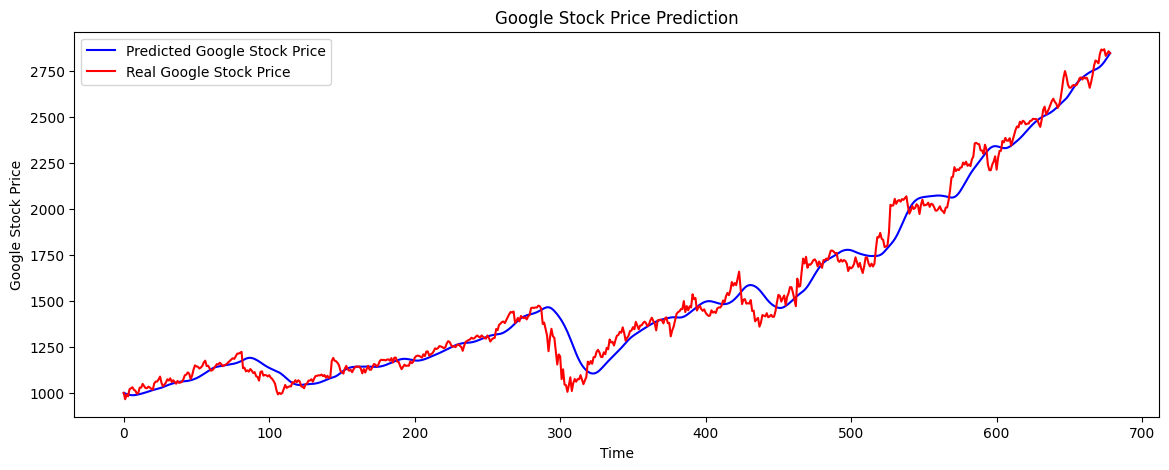

In [50]:
plt.figure(figsize=(14,5))
plt.plot(y_pred_rescaled, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [51]:
import plotly.express as px
fig = px.line( y_test,markers=True,title='Y test')
fig.show()
fig = px.line( y_pred_rescaled, markers=True ,title='prediction')
fig.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_rescaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_rescaled)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred_rescaled) / y_test)) * 100

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rescaled)

# Print all metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 52.46825510632239
Mean Squared Error (MSE): 5279.814517719837
Root Mean Squared Error (RMSE): 72.6623321791961
Mean Absolute Percentage Error (MAPE): 3.626993758683895%
R-squared: 0.9787870079506211


# R-squared is close to 1 and MAPE is close to 4% , it indicate the prediction is good